In [131]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np
import pylab as pl

# 機械学習

## 教師あり学習

![](img/plot_ML_flow_chart_1.png)

## データ読み込み

In [30]:
data = load_digits()

X = data["data"]
y = data["target"]
X.shape

(1797, 64)

1797点の手書き数字、それぞのの数字は8x8の画像です。

### 100点の数字を表示

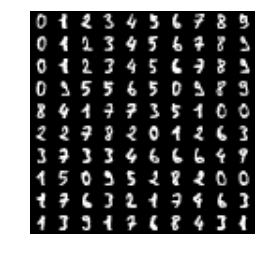

In [32]:
img = np.swapaxes(X[:100, :].reshape(10, 10, 8, 8), 1, 2)
img2 = np.zeros((10, 12, 10, 12))
img2[:, 2:-2, :, 2:-2] = img
img2.shape = 120, 120
pl.imshow(img2, cmap="gray")
pl.axis("off");

### 正解

In [34]:
print(y[:100].reshape(10, 10))

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 9 5 5 6 5 0 9 8 9]
 [8 4 1 7 7 3 5 1 0 0]
 [2 2 7 8 2 0 1 2 6 3]
 [3 7 3 3 4 6 6 6 4 9]
 [1 5 0 9 5 2 8 2 0 0]
 [1 7 6 3 2 1 7 4 6 3]
 [1 3 9 1 7 6 8 4 3 1]]


## 学習用とテスト用分け

In [82]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
print(Xtrain.shape, Xtest.shape)

(1257, 64) (540, 64)


## Support Vector Machineで学習

In [83]:
from sklearn.svm import LinearSVC

model1 = LinearSVC()
model1.fit(Xtrain, ytrain)
ypred = model1.predict(Xtest)

### 結果評価

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.94259259259259254

### 詳細リポート

In [85]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        66
          1       0.95      0.84      0.89        62
          2       1.00      0.92      0.96        37
          3       0.89      0.98      0.93        48
          4       0.95      0.98      0.96        55
          5       0.91      0.98      0.94        52
          6       0.96      0.98      0.97        53
          7       1.00      0.95      0.97        57
          8       0.83      0.84      0.83        51
          9       0.95      0.95      0.95        59

avg / total       0.94      0.94      0.94       540



### Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest, ypred))

[[66  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  1  1  0  7  1]
 [ 0  1 34  2  0  0  0  0  0  0]
 [ 0  0  0 47  0  1  0  0  0  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  1  0]
 [ 0  0  0  0  1  0 52  0  0  0]
 [ 0  0  0  0  1  0  0 54  0  2]
 [ 0  1  0  4  0  2  1  0 43  0]
 [ 0  0  0  0  1  1  0  0  1 56]]


## 他の学習方法

In [87]:
def test_model(klass, **kw):
    model = klass(**kw)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    return accuracy_score(ytest, ypred)    

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
test_model(RandomForestClassifier, n_estimators=100)

0.97037037037037033

### Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier
test_model(KNeighborsClassifier)

0.98888888888888893

## 教師なし学習

![](img/machine_learning2.jpg)

In [156]:
#%skip
def show_image(X, nrow, ncol):
    X = X[:nrow * ncol]
    img = np.swapaxes(X.reshape(nrow, ncol, 8, 8), 1, 2)
    img2 = np.zeros((nrow, 12, ncol, 12))
    img2[:, 2:-2, :, 2:-2] = img
    img2.shape = nrow * 12, ncol * 12
    pl.figure()
    pl.imshow(img2, cmap="gray")
    pl.axis("off");
    
def show_cluster_result(X, labels, n=20):
    todo = np.where(np.bincount(labels) > n)[0]
    index = np.concatenate([np.where(labels == label)[0][:n] for label in todo])
    show_image(X[index], 10, n)

### KMeans

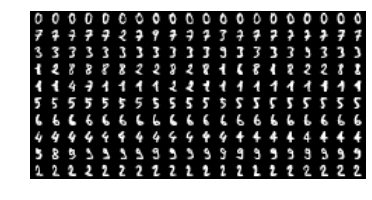

In [158]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, max_iter=1000)
labels = model.fit_predict(X)
show_cluster_result(X, labels)

### AffinityPropagation

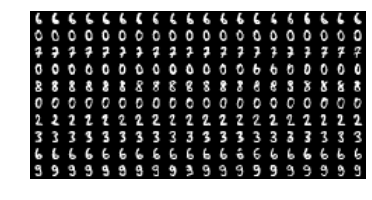

In [159]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(max_iter=100)
labels = model.fit_predict(X)
show_cluster_result(X, labels)

### AgglomerativeClustering

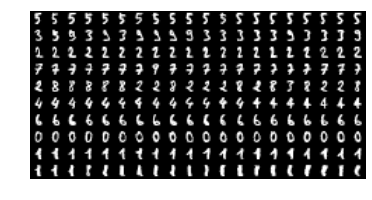

In [169]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=10)
labels = model.fit_predict(X)
show_cluster_result(X, labels)